#**Machine Learning Lab 3 - Performing Dimensionality Reduction on Breast Cancer & Modeling Building**

Submitted By

Name: **Prateek Kumar**

Register Number: **2248013**

Class: **2 MSc Data Science**



#Lab Overview

Part A: Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)

Part B: Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.

**About the Dataset**

The breast cancer dataset is a classic and very easy binary classification dataset.

1.   Classes - 2
2.   Samples per class - 212(M),357(B)
3.   Samples total - 569
4.   Dimensionality - 30
5.   Features - real, positive


**Objective**

Get familiar with the problem statement, Know the dataset thoroghly, Analyse the given dataset by exploring the hidden insights with beautiful visuals and Perform PCA nad LDA on breast cancer dataset.

**Problem Definition**

1) Understand the Dataset & Features.

2) Perform Data Preprocessing Technique to Get Balanced Structured Data.

3)Perform Statistical Data Analysis and 
Derive Valuable Inferences.

4)Perform Exploratory Data Analysis and Derive Valuable Insights.

5)Perform PCA and LDA.

6)Perform Model building Parametric and Non-Parametric 

**Approach**

This is an extension to the Problem Defnintion. Mention the process/appraoch that you have followed in order to reach out the above problem defintion.

Step 1: Know the dataset thoroughly.

Step 2: Perform preprocessing on data.

Step 3: Import needfull libraries as an when you try to plot different graphs and evaluate the model.

Step 4: Perform Statistical Data Analysis and Derive Valuable Inferences.

Step 5: Perform Exploratory Data 
Analysis and Derive Valuable Insights.

Step 6: Perform PCA and PCA.

**Sections**

Here, mentioned sections are defined in the below code. For this lab, the sections are -
*  Lab Overview
*  Dataset Overview
*  Data Science Process
*  About PCA AND LDA
*  Implementation of PCA and LDA
*  Conclusion


**References**

PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://towardsdatascience.com/principal-component-analysis-for-breast-cancer-data-with-r-and-python-b312d28e911f

https://www.kaggle.com/jahirmorenoa/pca-to-the-breast-cancer-data-set

https://www.youtube.com/watch?v=e2sM7ccaA9c&ab_channel=DigitalSreeni

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example

https://github.com/gtraskas/breast_cancer_prediction/blob/master/breast_cancer.ipynb

LDA

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

https://machinelearningmastery.com/linear-discriminant-analysis-with-python/

https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/

https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/




**Importing the Libraries**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Loading the inbuilt Dataset**

In [98]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[ 17.99,  10.38, 122.8 , ...,   0.27,   0.46,   0.12],
        [ 20.57,  17.77, 132.9 , ...,   0.19,   0.28,   0.09],
        [ 19.69,  21.25, 130.  , ...,   0.24,   0.36,   0.09],
        ...,
        [ 16.6 ,  28.08, 108.3 , ...,   0.14,   0.22,   0.08],
        [ 20.6 ,  29.33, 140.1 , ...,   0.27,   0.41,   0.12],
        [  7.76,  24.54,  47.92, ...,   0.  ,   0.29,   0.07]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 

**Creating the Dataframe**

In [99]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = pd.Series(data.target)

**Shape of a DataFrame**

In [100]:
df.shape

(569, 31)

**Columns of the Dataframe**

In [101]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

**Head function for first five default rows**

In [102]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Tail function for Last five default rows**

In [103]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


**Info() method prints information about the DataFrame**

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Describe() method returns description of the data in the DataFrame**

In [105]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Isnull.sum() returns the number of missing values in the dataset.**

In [106]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [107]:
from scipy.stats import skew
for col in df.drop('target', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column mean radius is 0.9423795716730992
Skewness for the column mean texture is 0.6504495420828159
Skewness for the column mean perimeter is 0.9906504253930081
Skewness for the column mean area is 1.6457321756240424
Skewness for the column mean smoothness is 0.45632376481955844
Skewness for the column mean compactness is 1.1901230311980404
Skewness for the column mean concavity is 1.4011797389486722
Skewness for the column mean concave points is 1.1711800812336282
Skewness for the column mean symmetry is 0.7256089733641999
Skewness for the column mean fractal dimension is 1.3044888125755076
Skewness for the column radius error is 3.0886121663847574
Skewness for the column texture error is 1.646443808753053
Skewness for the column perimeter error is 3.443615202194899
Skewness for the column area error is 5.447186284898394
Skewness for the column smoothness error is 2.314450056636759
Skewness for the column compactness error is 1.9022207096378565
Skewness for the column

**Correlation Plot**

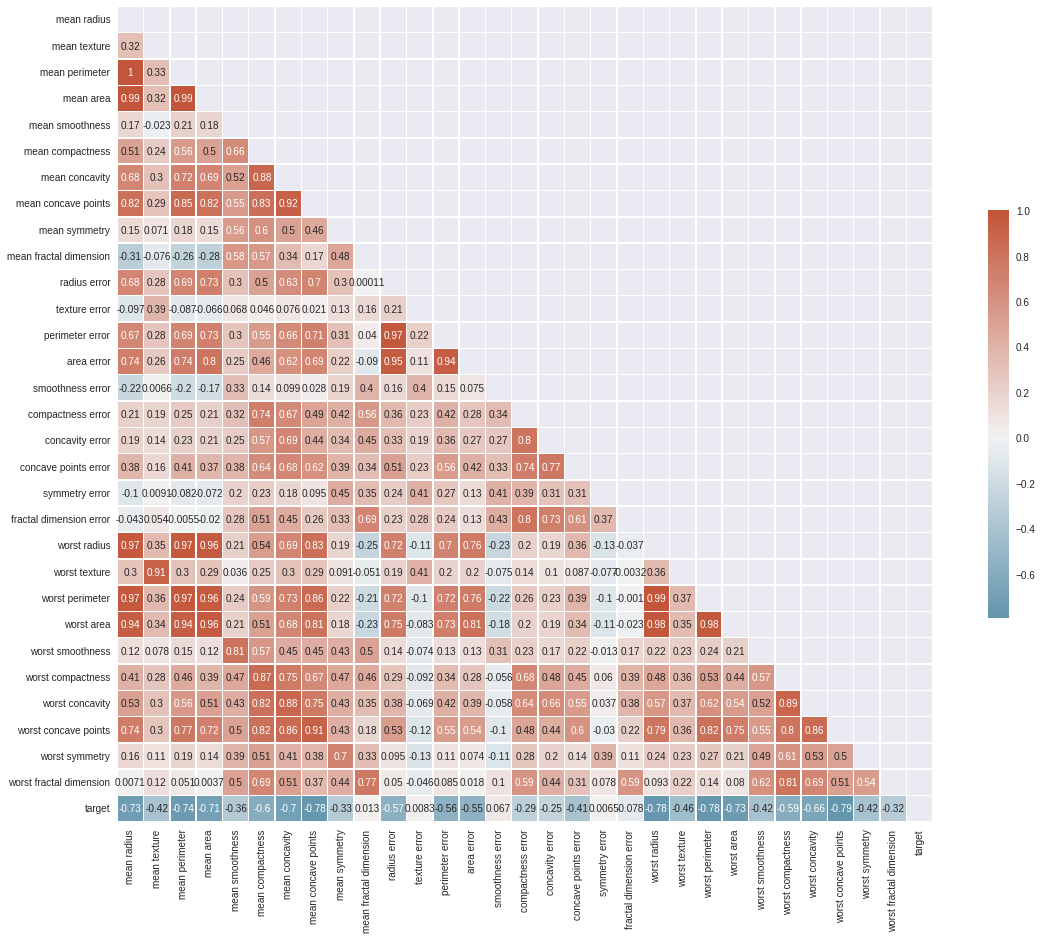

In [108]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

Maximum correlation between two variables is represent as red and minimum as blue and maximum is 0.99 and minimum-0.79

In [109]:
BC = df.copy()

In [110]:
df['target'].replace(0, 'Malignant',inplace = True)
df['target'].replace(1, 'Benign',inplace = True)

In [111]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.2416,0.18600,0.2750,0.08902,Malignant
123,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.98,102.80,745.5,0.1313,0.17880,0.2560,0.12210,0.2889,0.08006,Benign
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.1368,0.31010,0.4399,0.22800,0.2268,0.07425,Malignant
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083,Benign
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,18.47,188.50,2499.0,0.1142,0.15160,0.3201,0.15950,0.1648,0.05525,Malignant


In [112]:
df1 = df.copy()

In [113]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [114]:
df1.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Benign


In [115]:
df_features = df1.drop(['target'], axis=1)
df_label = BC['target']

In [116]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(df_features)

StandardScaler()

In [117]:
scaled_data = standardized.transform(df_features)
scaled_data

array([[ 1.1 , -2.07,  1.27, ...,  2.3 ,  2.75,  1.94],
       [ 1.83, -0.35,  1.69, ...,  1.09, -0.24,  0.28],
       [ 1.58,  0.46,  1.57, ...,  1.96,  1.15,  0.2 ],
       ...,
       [ 0.7 ,  2.05,  0.67, ...,  0.41, -1.1 , -0.32],
       [ 1.84,  2.34,  1.98, ...,  2.29,  1.92,  2.22],
       [-1.81,  1.22, -1.81, ..., -1.75, -0.05, -0.75]])

In [118]:
scaled_data.shape

(569, 30)

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(n_components=3)

In [121]:
pca.fit(scaled_data)

PCA(n_components=3)

In [122]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.19,  1.95, -1.12],
       [ 2.39, -3.77, -0.53],
       [ 5.73, -1.08, -0.55],
       ...,
       [ 1.26, -1.9 ,  0.56],
       [10.37,  1.67, -1.88],
       [-5.48, -0.67,  1.49]])

In [123]:
x_pca.shape

(569, 3)

In [124]:
def diag(x):
    if x == 'Malignant':
        return 0
    else:
        return 1
df_diag = df1['target'].apply(diag)

In [125]:
x_pca[:1]

array([[ 9.19,  1.95, -1.12]])

In [126]:
X = BC.iloc[:, 1:].values
y = BC['target'].values

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

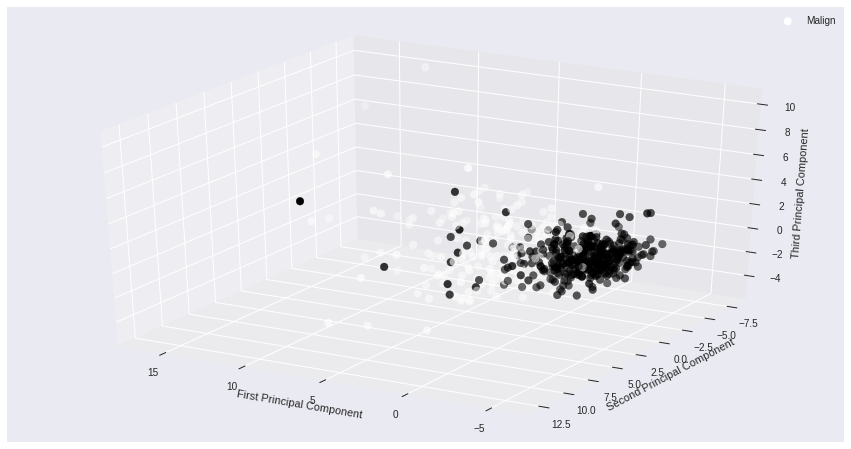

In [130]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c = df_diag, s = 60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Second Principal Component')

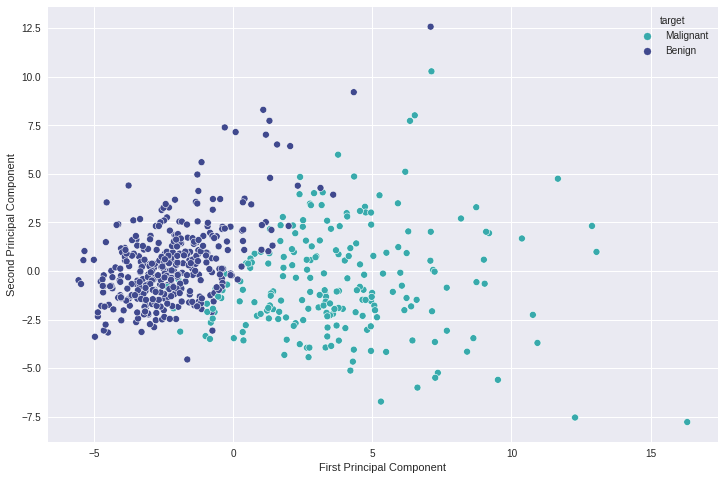

In [131]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue = df1['target'], palette = 'mako_r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Third Principal Component')

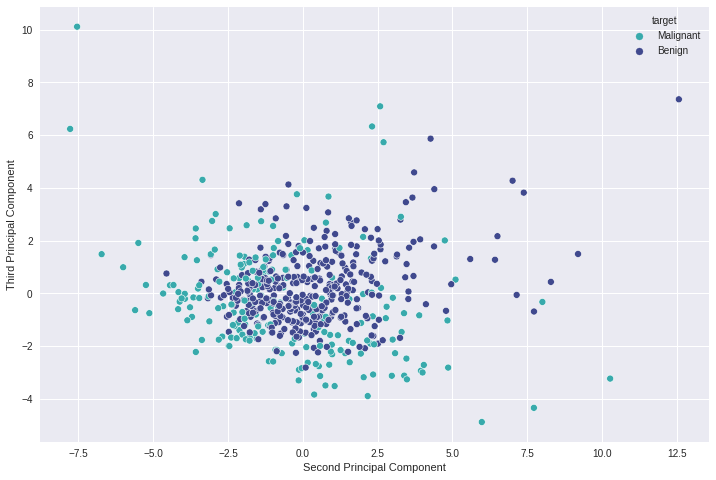

In [132]:
ax = plt.figure(figsize = (12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue = df['target'], palette = 'mako_r' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Third Principal Component')

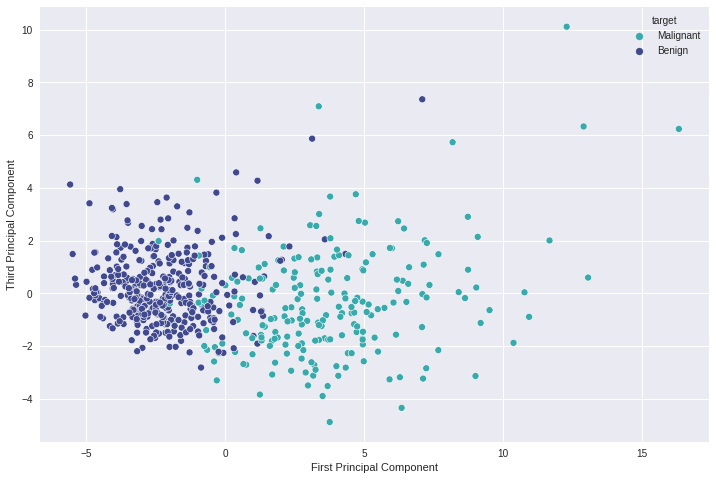

In [133]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue = df1['target'], palette = 'mako_r' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

In [134]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [135]:
df_pc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.105748,0.222291,0.215790,0.145324,0.244990,0.260670,0.261783,0.138251,0.067793,0.202935,...,0.108481,0.231686,0.220891,0.136995,0.214501,0.233147,0.253920,0.126282,0.138953,-0.221681
1,-0.066588,-0.227919,-0.241720,0.172091,0.137462,0.050817,-0.049774,0.186456,0.366106,-0.123880,...,-0.049489,-0.217958,-0.232663,0.163091,0.133321,0.093710,-0.018541,0.136698,0.271324,0.094481
2,0.038279,0.002205,0.043885,-0.090009,-0.069131,0.024358,-0.008712,-0.029102,-0.024590,0.288459,...,-0.074441,-0.037441,0.002229,-0.256527,-0.238474,-0.160504,-0.165802,-0.271152,-0.233532,0.112780


Correlation Plot of principal components and its features of all variables.

Text(114.0, 0.5, 'Principal Components')

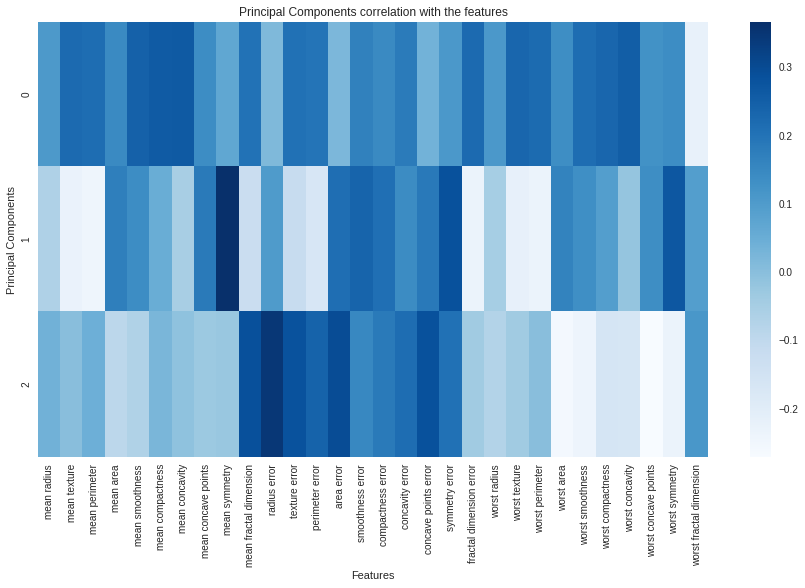

In [136]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap = 'Blues')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

In [137]:
df_new = BC[['target', 'mean radius', 'mean texture', 'mean smoothness',
            'mean compactness', 'mean symmetry', 'mean fractal dimension',
            'radius error', 'texture error', 'smoothness error',
            'compactness error', 'concave points error', 'symmetry error',
            'fractal dimension error', 'worst concavity', 'worst symmetry',
            'worst fractal dimension']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, test_size=0.3, random_state=42)

#print_ml_results()

In [138]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)
# Transform features by scaling each feature to a given range. 
# This estimator scales and translates each feature individually such that it is in the given range on the training set
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(df_features)

# Scaled Data and Unscaled Data
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[13.74 17.91  0.08 ...  0.16  0.23  0.07]
 [13.37 16.39  0.07 ...  0.33  0.2   0.08]
 [14.69 13.98  0.1  ...  0.32  0.28  0.09]
 ...
 [14.29 16.82  0.06 ...  0.04  0.25  0.06]
 [13.98 19.62  0.11 ...  0.41  0.32  0.11]
 [12.18 20.52  0.08 ...  0.11  0.27  0.07]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


Principal component analysis (PCA) - Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [139]:
from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(df_features)

# After compressing the data by reducing the dimensionality using PCA, we can reconstruct the data and return it to its original dimension by inverse the transformation,
#there will be an information losses, we cant reconstruct the original data 100%

pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

In [140]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

In [141]:
predA = logistic_regressor.predict(X_test)
y_prob = logistic_regressor.predict_proba(X_test)
predA[0:5]

array([0, 1, 1, 1, 1])

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(predA, y_test)

y_prob[0:5]

array([[0.99, 0.01],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ]])

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predA))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [144]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predA)
CM

array([[46,  1],
       [ 1, 66]])

In [145]:
Accuracy = (CM[0][0] + CM[1][1]) / (CM[0][0] + CM[1][1] + CM[0][1] + CM[1][0])
Accuracy

0.9824561403508771

In [146]:
ErrorRate = (CM[0][1] + CM[1][0]) / (CM[0][0] + CM[1][1] + CM[0][1] + CM[1][0])
ErrorRate

0.017543859649122806

In [147]:
Sensitivity = CM[0][0]/(CM[0][0] + CM[1][0])
Sensitivity

0.9787234042553191

In [148]:
Specificity = CM[1][1]/(CM[1][1] + CM[0][1])
Specificity

0.9850746268656716

In [149]:
Recall = CM[0][0]/(CM[0][0] + CM[1][0])
Recall

0.9787234042553191

In [150]:
Precision = CM[0][0]/(CM[0][0] + CM[0][1])
Precision


0.9787234042553191

In [151]:
F1Score = (2*(Precision*Recall))/(Precision + Recall)
F1Score

0.9787234042553191


Evaluating the Effect of Parameters For Logistic Regression


In [152]:
from sklearn.metrics import accuracy_score
def doLogisticRegression(X, y, test_size = 0.30, random_state = 42, penalty='l2', solver='lbfgs'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    logistic_regressor = LogisticRegression(penalty = penalty, solver = solver)
    logistic_regressor.fit(X_train, y_train)
    y_pred = logistic_regressor.predict(X_test)
    
    acc_score = accuracy_score(y_test, y_pred)
    
    return acc_score

df2 = pd.DataFrame(columns = ['Test Size', 'Random States', 'Penalty', 'Solvers', 'Accuracy'])
df2

,Test Size,Random States,Penalty,Solvers,Accuracy


In [153]:
penalties = ['none', 'l2']
test_size = [0.30, 0.25, 0.20]
random_states = [21, 42, 84]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for t_size in test_size:
    for r_state in random_states:
        for penalty in penalties:
            for solver in solvers:
                accuracy = doLogisticRegression(X, y, t_size, r_state, penalty)
                df = {}
                df['Test Size'] = t_size
                df['Random States'] = r_state
                df['Penalty'] = penalty
                df['Solvers'] = solver
                df['Accuracy'] = accuracy

                df2 = df2.append(df, ignore_index = True)
df2.sample(10)


,Test Size,Random States,Penalty,Solvers,Accuracy
26,0.30,84,l2,lbfgs,0.988304
66,0.20,21,l2,lbfgs,0.964912
70,0.20,42,none,newton-cg,1.000000
20,0.30,84,none,newton-cg,0.988304
18,0.30,42,l2,sag,1.000000
64,0.20,21,none,saga,0.964912
84,0.20,84,none,saga,0.991228
16,0.30,42,l2,lbfgs,1.000000
32,0.25,21,none,liblinear,0.979021
62,0.20,21,none,liblinear,0.964912


Implementing KNN Classifier

In [154]:
from sklearn.model_selection import train_test_split

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(df_features,
                                                                            df_label,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


Evaluation of the knn algorithm

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clf = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()

Training time: 0.007 s
Prediction time: 0.012 s

Report:

Accuracy: 0.9590643274853801

               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 57   6]
 [  1 107]]


Evaluating the Effect of Parameters For K Nearest Neighbours

In [156]:
def doKNearestNeighbour(X, y, test_size = 0.20, randomstate = 8,nn = 5 ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = randomstate)
    cls1 = KNeighborsClassifier(n_neighbors = nn)
    cls1.fit(X_train, y_train)
    pred1 = cls1.predict(X_test)
    acc_score1 = accuracy_score(pred1,y_test)
    return acc_score1

test_size = [0.30, 0.25, 0.20,0.10]
random_states = [8, 27, 42]
n_neighbours = [2,3,4,5]

criterions=['gini', 'entropy']
maxfeatures=['auto', 'sqrt', 'log2']
penalties = [ 'l1', 'elasticnet','none', 'l2']
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

df3 = pd.DataFrame(columns = ['Test Size', 'Random States','Number of neighbours','K-nearest neighbour Accuracy'])
for t_size in test_size:
    for r_state in random_states:
        for neigh in n_neighbours:
            a1 = doKNearestNeighbour(X, y, t_size, r_state,neigh)
            KNearestNeighbours = {} 
            KNearestNeighbours['Test Size'] = t_size
            KNearestNeighbours['Random States'] = r_state
            KNearestNeighbours['Number of neighbours'] = neigh
            KNearestNeighbours['K-nearest neighbour Accuracy'] = a1

            df3 = df3.append(KNearestNeighbours, ignore_index = True)
df3.sample(10)

,Test Size,Random States,Number of neighbours,K-nearest neighbour Accuracy
7,0.30,27.0,5.0,0.912281
22,0.25,42.0,4.0,0.944056
5,0.30,27.0,3.0,0.923977
15,0.25,8.0,5.0,0.930070
45,0.10,42.0,3.0,0.964912
33,0.20,42.0,3.0,0.929825
20,0.25,42.0,2.0,0.923077
6,0.30,27.0,4.0,0.935673
28,0.20,27.0,2.0,0.938596
8,0.30,42.0,2.0,0.929825


Remove Highly Correlated Features



In [157]:
df_new = BC[['target', 'mean radius', 'mean texture', 'mean smoothness',
            'mean compactness', 'mean symmetry', 'mean fractal dimension',
            'radius error', 'texture error', 'smoothness error',
            'compactness error', 'concave points error', 'symmetry error',
            'fractal dimension error', 'worst concavity', 'worst symmetry',
            'worst fractal dimension']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, test_size=0.3, random_state=42)

print_ml_results()

Training time: 0.001 s
Prediction time: 0.009 s

Report:

Accuracy: 0.9005847953216374

               precision    recall  f1-score   support

         0.0       0.94      0.78      0.85        63
         1.0       0.88      0.97      0.93       108

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

[[ 49  14]
 [  3 105]]


Cross Validation and Scaling

In [158]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(df_features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[13.74 17.91  0.08 ...  0.16  0.23  0.07]
 [13.37 16.39  0.07 ...  0.33  0.2   0.08]
 [14.69 13.98  0.1  ...  0.32  0.28  0.09]
 ...
 [14.29 16.82  0.06 ...  0.04  0.25  0.06]
 [13.98 19.62  0.11 ...  0.41  0.32  0.11]
 [12.18 20.52  0.08 ...  0.11  0.27  0.07]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


Tunning the algorithm and Putting it all together with GridSearchCV and Pipeline

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(df_features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            df_label,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [160]:
parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

In [161]:
# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)


Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Best f1-score:
0.9683181526777084
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'reduce_dim': PCA(iterated_power=7, n_components=5), 'reduce_dim__n_components': 5}
[[ 60   3]
 [  2 106]]
Time passed:  17.645 s


Pipeline(steps=[('reduce_dim', PCA(iterated_power=7, n_components=5)),
                ('clf', KNeighborsClassifier(n_neighbors=6))])

Combine PCA and Feature Selection with FeatureUnion

In [162]:
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)


Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Best f1-score:
0.972062007879971
Best parameters:
{'clf__algorithm': 'auto', 'clf__n_neighbors': 6, 'features__pca': PCA(iterated_power=7, n_components=5), 'features__pca__n_components': 5, 'features__univ_select__k': 3}
[[ 60   3]
 [  3 105]]
Time passed:  48.402 s


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca',
                                                 PCA(iterated_power=7,
                                                     n_components=5)),
                                                ('univ_select',
                                                 SelectKBest(k=3))])),
                ('clf', KNeighborsClassifier(n_neighbors=6))])

The **Cumulative explained variance** shows the accumulation of variance for each principal component number. The individual explained variance describes the variance of each principal component.

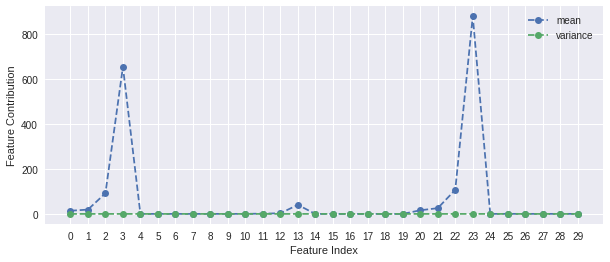

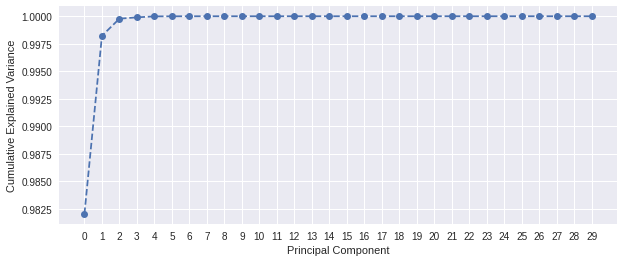

In [163]:
def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

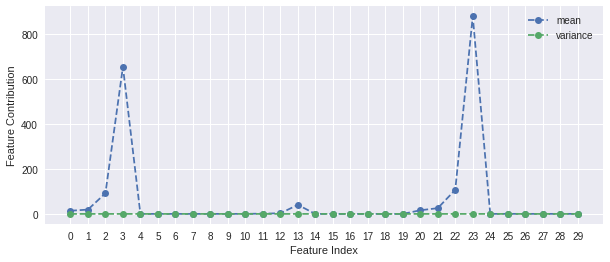

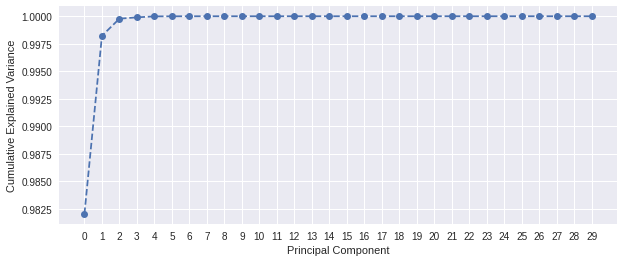

In [164]:
pca_inversed_data = pca.inverse_transform(np.eye(30))
plot_pca()

In [166]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest()
select.fit(features_train, labels_train)
scores = select.scores_
# Show the scores in a table
#feature_scores = zip(df.columns.values.tolist(), scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [169]:
def plot_2d(component1):
    fig = go.Figure(data = go.Scatter(x = component1, mode ='markers', 
                                      marker = dict(size = 20, color = y, colorscale = 'Rainbow', 
                                                    showscale = True, line_width = 1)))
    fig.update_layout(margin = dict(l = 100,r = 100,b = 100,t = 100))                 
    fig.layout.template = 'plotly_dark'

    fig.show()

In [170]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_features)

In [171]:
X_LDA = LDA(n_components = 1).fit_transform(X, y)
X_LDA

array([[-3.32],
       [-2.32],
       [-3.75],
       [-4.05],
       [-2.28],
       [-1.61],
       [-2.36],
       [-1.28],
       [-1.61],
       [-3.86],
       [-0.86],
       [-2.4 ],
       [-1.33],
       [-0.42],
       [-1.25],
       [-3.07],
       [-2.11],
       [-3.18],
       [-3.44],
       [ 0.22],
       [ 1.98],
       [ 2.47],
       [-1.79],
       [-3.03],
       [-3.87],
       [-4.  ],
       [-2.75],
       [-2.58],
       [-3.08],
       [-0.8 ],
       [-3.42],
       [-2.68],
       [-3.64],
       [-3.08],
       [-2.69],
       [-2.57],
       [-1.07],
       [ 1.87],
       [ 0.49],
       [-0.94],
       [ 0.23],
       [-0.29],
       [-4.11],
       [-1.46],
       [-1.41],
       [-3.45],
       [ 3.28],
       [-2.18],
       [ 1.29],
       [ 0.3 ],
       [ 1.63],
       [ 1.49],
       [ 1.48],
       [-1.46],
       [-0.91],
       [ 0.98],
       [-3.14],
       [-1.98],
       [ 1.63],
       [ 2.61],
       [ 2.37],
       [ 2.59],
       [

In [172]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

 LDA component, one can compute the amount of variance it can explain in the data by regressing the data onto this component; this value will in general be larger than this component's own "captured" variance.

In [173]:
lda.explained_variance_ratio_

array([1.])

**PCA Explained variance ratio represents the variance explained using a particular eigenvector**

In [174]:
pca.explained_variance_ratio_

array([0.98, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [175]:
plot_2d(X_LDA[:,0])

In [176]:
plot_2d(X_LDA[:])

#**Conclusion**

In this lab, we have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights, furthermore, we implemented and evaluated various classification models to get high accuracy in terms of predicting breast cancer with that we perform dimensionality reduction which can help the doctors to predict breast cancer for the patients.